In [1]:
import pandas as pd
import numpy as np
#pd.pandas.set_option('display.max_columns',None)
#pd.pandas.set_option('display.max_rows',None)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df = pd.read_csv('cleaned_data.csv')
df.head()

ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  ...  \
0   PMO - US  Direct Drop              EXW           Air  ...   
1   PMO - US  Direct Drop              EXW           Air  ...   
2   PMO - US  Direct Drop              FCA           Air  ...   
3   PMO - US  Direct Drop              EXW           Air  ...   
4   PMO - US  Direct Drop              EXW           Air  ...   

  Unit of Measure (Per Pack) Line Item Quantity Line Item Value Pack Price  \
0                         30                 19           551.0      29.00   
1                        240               1000          6200.0       6.20   
2                        100                500         40000.0      80.00   
3                         60              31920        127360.8       3.99   
4                         60              38000        121600.0       3.20   

  Unit Price             Manufacturing Site First Line Designation  \
0       0.97     Ranbaxy Fine Chemicals LTD                    Yes   
1       0.03      Aurobindo Unit III, India                    Yes   
2       0.80  ABBVIE GmbH & Co.KG Wiesbaden                    Yes   
3       0.07  Ranbaxy, Paonta Shahib, India                    Yes   
4       0.05      Aurobindo Unit III, India                    Yes   

  Weight (Kilograms) Freight Cost (USD) Line Item Insurance (USD)  
0             780.34             780.34                 31.586199  
1            4521.50            4521.50                 35.848354  
2            1653.78            1653.78                 85.806624  
3           16007.06           16007.06                193.851640  
4           45450.08           45450.08                157.295484  

[5 rows x 33 columns]

### EDA

In [4]:
df.isnull().sum()

ID                              0
Project Code                    0
PQ #                            0
PO / SO #                       0
ASN/DN #                        0
Country                         0
Managed By                      0
Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                   0
PQ First Sent to Client Date    0
PO Sent to Vendor Date          0
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Product Group                   0
Sub Classification              0
Vendor                          0
Item Description                0
Molecule/Test Type              0
Brand                           0
Dosage                          0
Dosage Form                     0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Manufacturing Site              0
First Line Des

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8538 entries, 0 to 8537
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            8538 non-null   int64  
 1   Project Code                  8538 non-null   object 
 2   PQ #                          8538 non-null   object 
 3   PO / SO #                     8538 non-null   object 
 4   ASN/DN #                      8538 non-null   object 
 5   Country                       8538 non-null   object 
 6   Managed By                    8538 non-null   object 
 7   Fulfill Via                   8538 non-null   object 
 8   Vendor INCO Term              8538 non-null   object 
 9   Shipment Mode                 8538 non-null   object 
 10  PQ First Sent to Client Date  8538 non-null   object 
 11  PO Sent to Vendor Date        8538 non-null   object 
 12  Scheduled Delivery Date       8538 non-null   object 
 13  Del

In [6]:
num_cols = [i for i in df.columns if df[i].dtypes!='O']
print(num_cols)
df[num_cols]

['ID', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)']


ID  Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
0         1                          30                  19           551.00   
1         3                         240                1000          6200.00   
2         4                         100                 500         40000.00   
3        15                          60               31920        127360.80   
4        16                          60               38000        121600.00   
...     ...                         ...                 ...              ...   
8533  86815                          60               15000         97800.00   
8534  86816                          30                6724         20978.88   
8535  86817                          60              205243        738874.80   
8536  86818                          60              166571        599655.60   
8537  86819                          60               21072        137389.44   

      Pack Price  Unit Price  Weight (Kilograms)  Freight Cost (USD)  \
0          29.00        0.97              780.34              780.34   
1           6.20        0.03             4521.50             4521.50   
2          80.00        0.80             1653.78             1653.78   
3           3.99        0.07            16007.06            16007.06   
4           3.20        0.05            45450.08            45450.08   
...          ...         ...                 ...                 ...   
8533        6.52        0.11             3410.00             3410.00   
8534        3.12        0.10            47281.56            47281.56   
8535        3.60        0.06            46111.55            46111.55   
8536        3.60        0.06            46111.55            46111.55   
8537        6.52        0.11            14734.92            14734.92   

      Line Item Insurance (USD)  
0                     31.586199  
1                     35.848354  
2                     85.806624  
3                    193.851640  
4                    157.295484  
...                         ...  
8533                 115.110000  
8534                  24.690000  
8535                 869.660000  
8536                 705.790000  
8537                 161.710000  

[8538 rows x 9 columns]

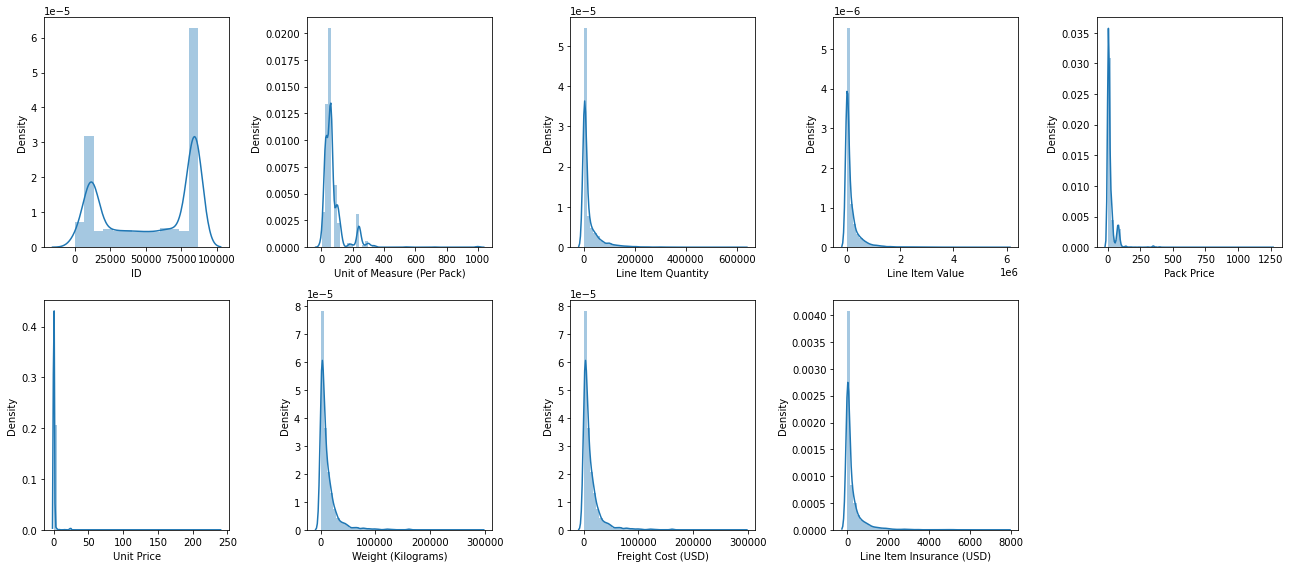

In [7]:
## distribution of numeric variable

plt.figure(figsize=(18,8))
number=1
for i in num_cols:
    if number <= 10:
        plt.subplot(2,5,number)
        sns.distplot(df[i])
    number+=1
plt.tight_layout()

#### Analysis:

From the distribution of numeric columns we can infer that there are more outliers in each features.

In [8]:
### discrete features
discrete_cols = [i for i in num_cols if df[i].dtypes=='int64' and i not in ['ID']]
print(discrete_cols)
df[discrete_cols]

['Unit of Measure (Per Pack)', 'Line Item Quantity']


Unit of Measure (Per Pack)  Line Item Quantity
0                             30                  19
1                            240                1000
2                            100                 500
3                             60               31920
4                             60               38000
...                          ...                 ...
8533                          60               15000
8534                          30                6724
8535                          60              205243
8536                          60              166571
8537                          60               21072

[8538 rows x 2 columns]

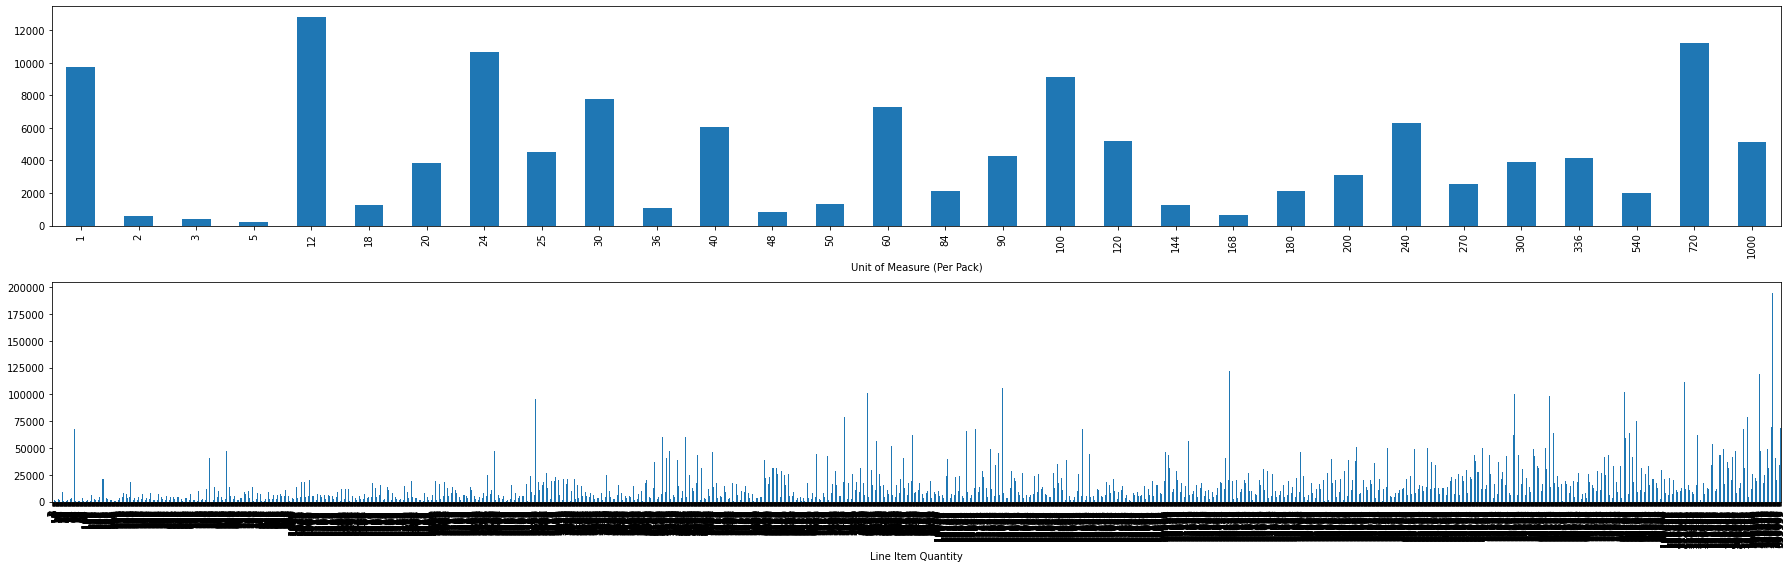

In [9]:
## Visualizing the discrete columns with target feature

plt.figure(figsize=(25,8))
number=1
for i in discrete_cols:
    if number <= 3:
        plt.subplot(2,1,number)
        df.groupby(i)['Freight Cost (USD)'].median().plot.bar()
    number+=1
plt.tight_layout()

In [10]:
continuous_cols = [i for i in num_cols if df[i].dtypes=='float64' and i not in ['ID']]
print(continuous_cols)
df[continuous_cols]

['Line Item Value', 'Pack Price', 'Unit Price', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)']


Line Item Value  Pack Price  Unit Price  Weight (Kilograms)  \
0              551.00       29.00        0.97              780.34   
1             6200.00        6.20        0.03             4521.50   
2            40000.00       80.00        0.80             1653.78   
3           127360.80        3.99        0.07            16007.06   
4           121600.00        3.20        0.05            45450.08   
...               ...         ...         ...                 ...   
8533         97800.00        6.52        0.11             3410.00   
8534         20978.88        3.12        0.10            47281.56   
8535        738874.80        3.60        0.06            46111.55   
8536        599655.60        3.60        0.06            46111.55   
8537        137389.44        6.52        0.11            14734.92   

      Freight Cost (USD)  Line Item Insurance (USD)  
0                 780.34                  31.586199  
1                4521.50                  35.848354  
2                1653.78                  85.806624  
3               16007.06                 193.851640  
4               45450.08                 157.295484  
...                  ...                        ...  
8533             3410.00                 115.110000  
8534            47281.56                  24.690000  
8535            46111.55                 869.660000  
8536            46111.55                 705.790000  
8537            14734.92                 161.710000  

[8538 rows x 6 columns]

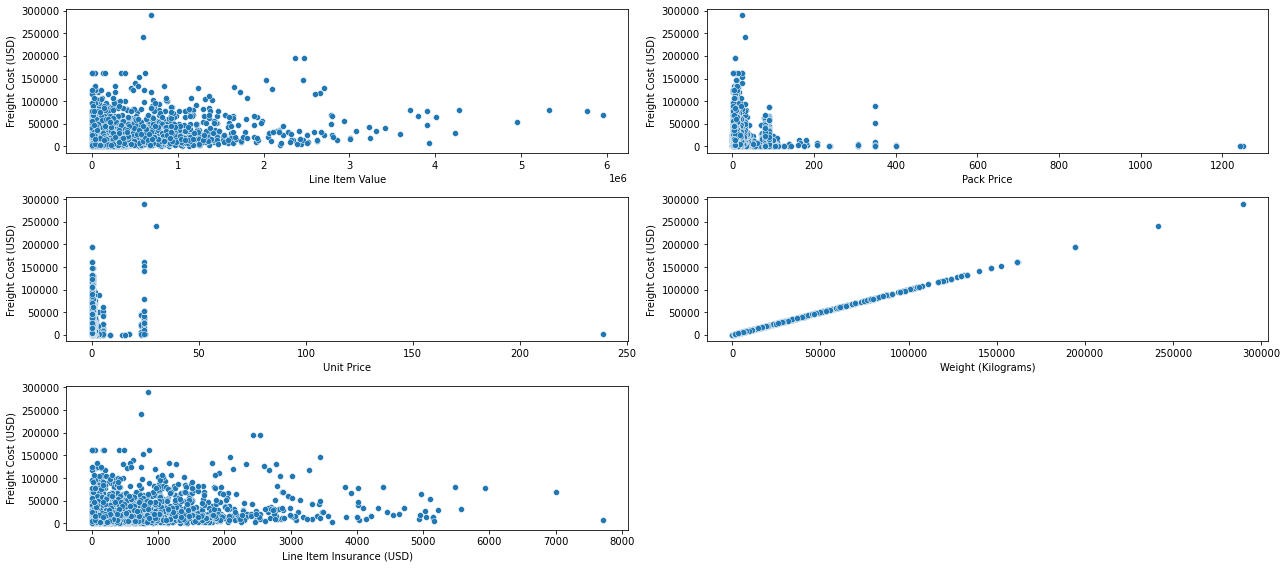

In [ ]:
## Visualizing the continuous columns with target feature

plt.figure(figsize=(18,8))
number=1
for i in continuous_cols:
    if i != 'Freight Cost (USD)':
        if number <= 6:
            plt.subplot(3,2,number)
            sns.scatterplot(df[i],df['Freight Cost (USD)'])
        number+=1
plt.tight_layout()

#### Analysis

The weight feature has a linear relationship with the freght cost.

In [11]:
## converting the features such as Scheduled Delivery Date,Delivered to Client Date and Delivery Recorded Date to datetime

df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'])
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'])
df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'])
## past due
df['diff_schdel_delivered_Date']=df['Delivered to Client Date'] - df['Scheduled Delivery Date']
df.head()

ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  ...  \
0   PMO - US  Direct Drop              EXW           Air  ...   
1   PMO - US  Direct Drop              EXW           Air  ...   
2   PMO - US  Direct Drop              FCA           Air  ...   
3   PMO - US  Direct Drop              EXW           Air  ...   
4   PMO - US  Direct Drop              EXW           Air  ...   

  Line Item Quantity Line Item Value Pack Price Unit Price  \
0                 19           551.0      29.00       0.97   
1               1000          6200.0       6.20       0.03   
2                500         40000.0      80.00       0.80   
3              31920        127360.8       3.99       0.07   
4              38000        121600.0       3.20       0.05   

              Manufacturing Site First Line Designation Weight (Kilograms)  \
0     Ranbaxy Fine Chemicals LTD                    Yes             780.34   
1      Aurobindo Unit III, India                    Yes            4521.50   
2  ABBVIE GmbH & Co.KG Wiesbaden                    Yes            1653.78   
3  Ranbaxy, Paonta Shahib, India                    Yes           16007.06   
4      Aurobindo Unit III, India                    Yes           45450.08   

  Freight Cost (USD) Line Item Insurance (USD) diff_schdel_delivered_Date  
0             780.34                 31.586199                     0 days  
1            4521.50                 35.848354                     0 days  
2            1653.78                 85.806624                     0 days  
3           16007.06                193.851640                     0 days  
4           45450.08                157.295484                     0 days  

[5 rows x 34 columns]

In [12]:
## temporal columns
temp_cols = [i for i in df.columns if 'Date' in i]
print(temp_cols)
df[temp_cols]

['PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date', 'diff_schdel_delivered_Date']


PQ First Sent to Client Date PO Sent to Vendor Date  \
0                  Pre-PQ Process      Date Not Captured   
1                  Pre-PQ Process      Date Not Captured   
2                  Pre-PQ Process      Date Not Captured   
3                  Pre-PQ Process      Date Not Captured   
4                  Pre-PQ Process      Date Not Captured   
...                           ...                    ...   
8533                       5/4/15         N/A - From RDC   
8534                       5/4/15         N/A - From RDC   
8535                     10/16/14         N/A - From RDC   
8536                     10/16/14         N/A - From RDC   
8537                     10/24/14         N/A - From RDC   

     Scheduled Delivery Date Delivered to Client Date Delivery Recorded Date  \
0                 2006-06-02               2006-06-02             2006-06-02   
1                 2006-11-14               2006-11-14             2006-11-14   
2                 2006-08-27               2006-08-27             2006-08-27   
3                 2006-09-01               2006-09-01             2006-09-01   
4                 2006-08-11               2006-08-11             2006-08-11   
...                      ...                      ...                    ...   
8533              2015-06-02               2015-05-15             2015-05-22   
8534              2015-06-30               2015-06-22             2015-06-29   
8535              2015-07-31               2015-07-15             2015-07-20   
8536              2015-07-31               2015-07-15             2015-07-20   
8537              2015-07-31               2015-08-06             2015-08-07   

     diff_schdel_delivered_Date  
0                        0 days  
1                        0 days  
2                        0 days  
3                        0 days  
4                        0 days  
...                         ...  
8533                   -18 days  
8534                    -8 days  
8535                   -16 days  
8536                   -16 days  
8537                     6 days  

[8538 rows x 6 columns]

Text(0, 0.5, 'Mean of Freight Cost (USD)')

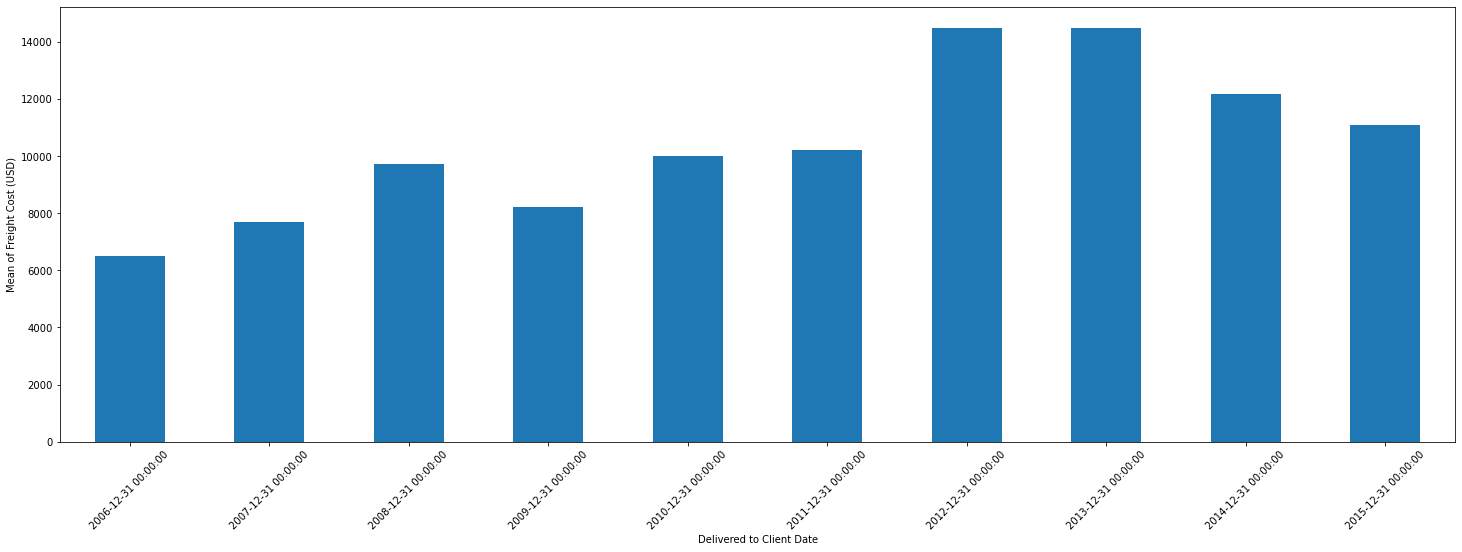

In [ ]:
## visualizing the target feature ie.mean freight cost yearwise
gk = df.groupby('Delivered to Client Date')['Freight Cost (USD)','Unit Price']
gk1 = gk.first()
gk1['Freight Cost (USD)'].resample(rule='A').mean().plot(kind='bar',figsize=(25,8))
plt.xlabel('Delivered to Client Date')
plt.xticks(rotation=45)
plt.ylabel('Mean of Freight Cost (USD)')

In [13]:
## Data of freight cost details year wise with respect to each vendor
gk3 = df.groupby(['Delivered to Client Date'])['Vendor','Manufacturing Site','Freight Cost (USD)']
gk4 = gk3.first()
b= gk4.groupby([pd.Grouper(freq="A"),"Vendor","Manufacturing Site"]).agg({"Manufacturing Site":np.size,"Freight Cost (USD)":np.mean})
bpt = b.pivot_table(index='Delivered to Client Date',columns='Vendor',values=['Freight Cost (USD)'],aggfunc='sum')
b

Manufacturing Site  \
Delivered to Client Date Vendor                                          Manufacturing Site                                   
2006-12-31               ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV) ABBVIE (Abbott) St. P'burg USA                   1   
                         Abbott GmbH & Co. KG                            ABBVIE GmbH & Co.KG Wiesbaden                   10   
                         Aurobindo Pharma Limited                        Aurobindo Unit III, India                       11   
                         BIO-RAD LABORATORIES (FRANCE)                   Bio-Rad Laboratories                             3   
                         BRISTOL-MYERS SQUIBB                            BMS Meymac, France                               1   
...                                                                                                                     ...   
2015-12-31               SCMS from RDC                                   Ranbaxy per Shasun Pharma                        1   
                                                                         Strides, Bangalore, India.                       4   
                         SWORDS LABORATORIES                             Bristol-Myers Squibb Anagni IT                   1   
                         Standard Diagnostics, Inc.                      Standard Diagnostics, Korea                      1   
                         Trinity Biotech, Plc                            Trinity Biotech, Plc                             7   

                                                                                                         Freight Cost (USD)  
Delivered to Client Date Vendor                                          Manufacturing Site                                  
2006-12-31               ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV) ABBVIE (Abbott) St. P'burg USA         7286.160000  
                         Abbott GmbH & Co. KG                            ABBVIE GmbH & Co.KG Wiesbaden          2309.292000  
                         Aurobindo Pharma Limited                        Aurobindo Unit III, India             13292.548182  
                         BIO-RAD LABORATORIES (FRANCE)                   Bio-Rad Laboratories                   3580.520000  
                         BRISTOL-MYERS SQUIBB                            BMS Meymac, France                     3292.150000  
...                                                                                                                     ...  
2015-12-31               SCMS from RDC                                   Ranbaxy per Shasun Pharma              9426.330000  
                                                                         Strides, Bangalore, India.             9032.190000  
                         SWORDS LABORATORIES                             Bristol-Myers Squibb Anagni IT          802.850000  
                         Standard Diagnostics, Inc.                      Standard Diagnostics, Korea            5924.890000  
                         Trinity Biotech, Plc                            Trinity Biotech, Plc                   7925.195714  

[346 rows x 2 columns]

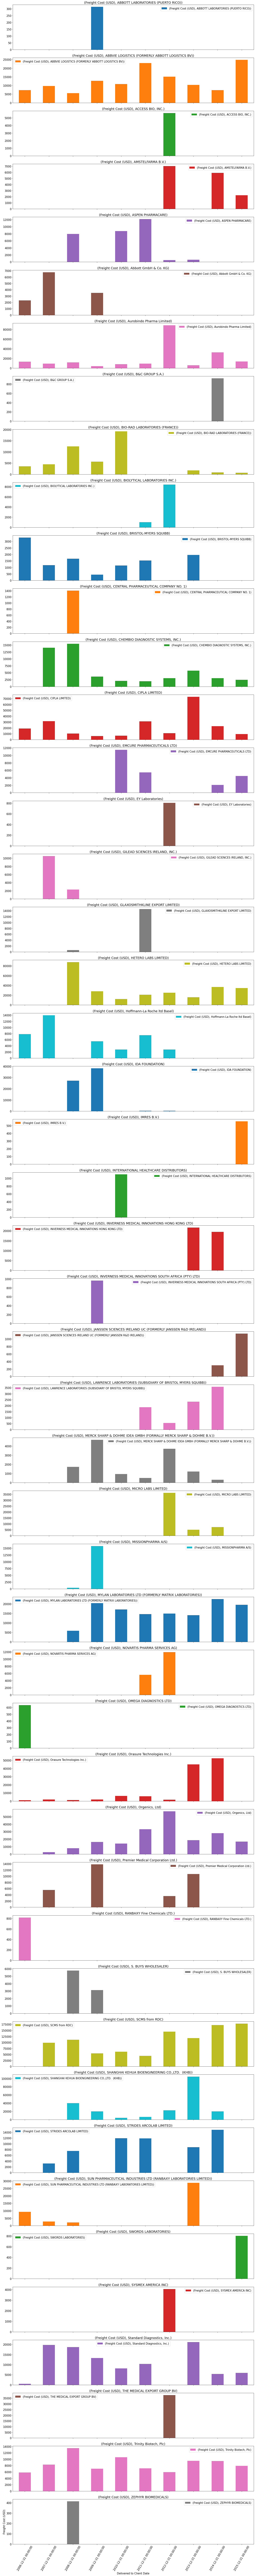

In [ ]:
## Visualizing the freight cost details yearwise with respect to each vendors.
bpt.plot(kind='bar',subplots=True,rot=0,figsize=(20,200),layout=(48,1))
#plt.rcParams.update({'font.size': 15})
plt.xlabel('Delivered to Client Date')
plt.ylabel('Freight Cost (USD)')
plt.xticks(rotation=60)
plt.tight_layout()

#### Analysis

From the above data we can analyse that:

- Every year from 2006-2015, the company procured from 'ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)' and the maximum amount of Freight cost will be around 20,000 to 25000 USD.
- Every year from 2006-2015, the company procured from 'Aurobindo Pharma Limited' and the maximum amount of Freight cost has reached upto 90000 USD in the year 2012.
- The companys procurement from 'BIO-RAD LABORATORIES (FRANCE)' has drastically reduced after 2010 and its freight cost in the same year is around 19000 USD.
- The freight cost from 'CHEMBIO DIAGNOSTIC SYSTEMS', INC has reached a maximum around 2008, with the amount of 15000 USD and decreased drastically in the period of 2009-2016.
- The freight cost reached a maximum of 70000 USD in CIPLA LIMITED in 2013.
- The Freight cost in 'HETERO LABS LIMITED' has reached a maximum of more that 80000 USD in 2008 and reduced in the comming years.
- The Freight cost in 'Orgenics.Ltd' has increased gradually reached a peak at 2012 of more than 50000 USD and decreased gradually.
- The Freight cost in SCMS frm RDC in the range 50000 USD to 175000 USD which is highest among all.
- Every year from 2006-2015, the company procured from 'Trinity Biotech, Plc' and the maximum amount of Freight cost has reached upto 12000 to 14000 USD.
- The Freight cost is around 400 USD from 'ZEPHYR BIOMEDICALS' only in the year 2008.

In [14]:
## Data of lineitemquantity details year wise with respect to each vendor
gk5 = df.groupby(['Delivered to Client Date'])['Vendor','Manufacturing Site','Line Item Quantity']
gk6 = gk5.first()
c= gk6.groupby([pd.Grouper(freq="A"),"Vendor","Manufacturing Site"]).agg({"Line Item Quantity":np.mean})
bpt1 = c.pivot_table(index='Delivered to Client Date',columns='Vendor',values=['Line Item Quantity'],aggfunc='sum')
c

Line Item Quantity
Delivered to Client Date Vendor                                          Manufacturing Site                                
2006-12-31               ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV) ABBVIE (Abbott) St. P'burg USA          198.000000
                         Abbott GmbH & Co. KG                            ABBVIE GmbH & Co.KG Wiesbaden           883.000000
                         Aurobindo Pharma Limited                        Aurobindo Unit III, India             14804.272727
                         BIO-RAD LABORATORIES (FRANCE)                   Bio-Rad Laboratories                    326.666667
                         BRISTOL-MYERS SQUIBB                            BMS Meymac, France                     2800.000000
...                                                                                                                     ...
2015-12-31               SCMS from RDC                                   Ranbaxy per Shasun Pharma             21868.000000
                                                                         Strides, Bangalore, India.            39692.250000
                         SWORDS LABORATORIES                             Bristol-Myers Squibb Anagni IT          466.000000
                         Standard Diagnostics, Inc.                      Standard Diagnostics, Korea            1400.000000
                         Trinity Biotech, Plc                            Trinity Biotech, Plc                   3455.857143

[346 rows x 1 columns]

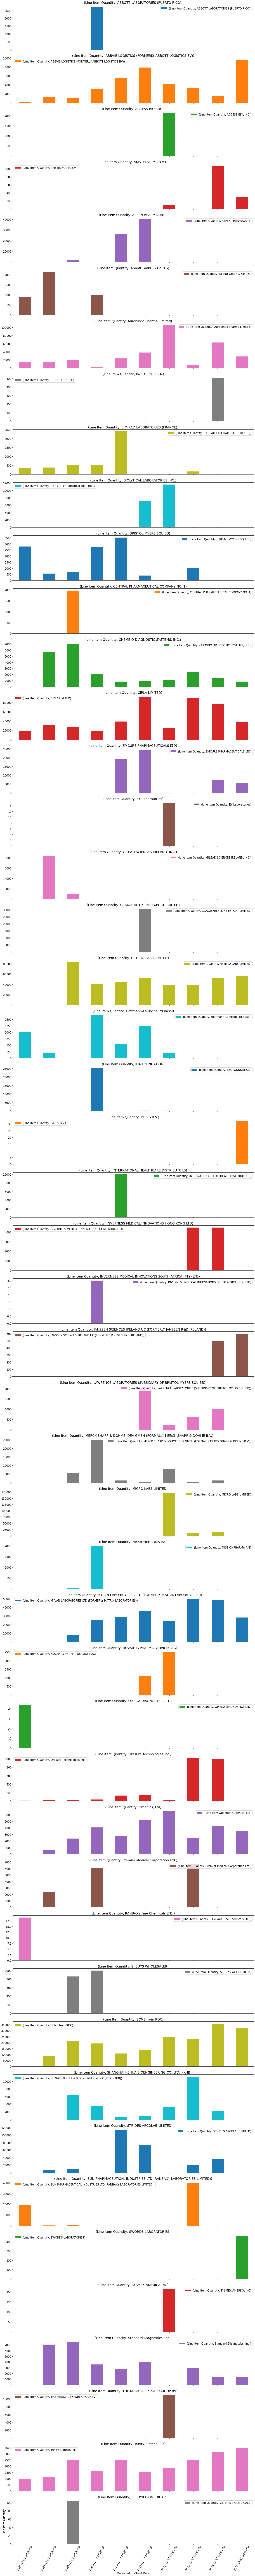

In [ ]:
## Visualizing the freight details yearwise with respect to each vendors.
bpt1.plot(kind='bar',subplots=True,rot=0,figsize=(20,200),layout=(48,1))
#plt.rcParams.update({'font.size': 15})
plt.xlabel('Delivered to Client Date')
plt.ylabel('Line Item Quantity')
plt.xticks(rotation=60)
plt.tight_layout()

#### Analysis

Fron the above visualization we can anayse that:

The graph with freight cost and graph with line item quantity is same for each vendor, ie. based on the line item quantity, the freight cost changes accordingly.

In [ ]:
gk7 = df.groupby(['Delivered to Client Date'])['Vendor','Manufacturing Site','Line Item Quantity','Freight Cost (USD)','Unit Price','Line Item Value','Weight (Kilograms)','Line Item Insurance (USD)','Dosage Form','Product Group','Sub Classification','Brand','Dosage','Country','Managed By','Vendor INCO Term','Shipment Mode']
gk8 = gk7.first()
d= gk8.groupby([pd.Grouper(freq="A"),"Vendor","Manufacturing Site"]).agg({"Line Item Quantity":np.mean,"Freight Cost (USD)":np.mean,"Weight (Kilograms)":np.mean})
e= gk8.groupby([pd.Grouper(freq="A"),"Vendor","Manufacturing Site"]).agg({"Unit Price":np.mean,"Dosage Form":'max',"Product Group":'max','Sub Classification':'max','Brand':'max','Dosage':'max'})
f = gk8.groupby([pd.Grouper(freq="A"),"Vendor","Manufacturing Site"]).agg({"Freight Cost (USD)":np.mean,"Country":'max',"Managed By":'max','Vendor INCO Term':'max','Shipment Mode':'max'})
d

Line Item Quantity  \
Delivered to Client Date Vendor                                             Manufacturing Site                                                       
2006-12-31               ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)    ABBVIE (Abbott) St. P'burg USA                              198.000000   
                         Abbott GmbH & Co. KG                               ABBVIE GmbH & Co.KG Wiesbaden                               883.000000   
                         Aurobindo Pharma Limited                           Aurobindo Unit III, India                                 14804.272727   
                         BIO-RAD LABORATORIES (FRANCE)                      Bio-Rad Laboratories                                        326.666667   
                         BRISTOL-MYERS SQUIBB                               BMS Meymac, France                                         2800.000000   
                         CIPLA LIMITED                                      Cipla, Goa, India                                         19000.000000   
                         Hoffmann-La Roche ltd Basel                        Roche Madrid                                               1000.000000   
                         OMEGA DIAGNOSTICS LTD                              OMEGA Diagnostics, UK                                        44.000000   
                         Orasure Technologies Inc.                          Pacific Biotech, Thailand                                    10.500000   
                         RANBAXY Fine Chemicals LTD.                        Ranbaxy Fine Chemicals LTD                                   19.000000   
                         SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LABO... Ranbaxy, Paonta Shahib, India                             19134.500000   
                         Standard Diagnostics, Inc.                         Standard Diagnostics, Korea                                  31.000000   
                         Trinity Biotech, Plc                               Not Applicable                                               45.000000   
                                                                            Trinity Biotech, Plc                                        900.000000   
2007-12-31               ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)    ABBVIE (Abbott) Logis. UK                                   760.000000   
                                                                            ABBVIE Ludwigshafen Germany                                 500.000000   
                         Abbott GmbH & Co. KG                               ABBVIE GmbH & Co.KG Wiesbaden                              2128.571429   
                         Aurobindo Pharma Limited                           Aurobindo Unit III, India                                 15933.875000   
                         BIO-RAD LABORATORIES (FRANCE)                      Bio-Rad Laboratories                                        375.000000   
                         BRISTOL-MYERS SQUIBB                               BMS Meymac, France                                          564.666667   
                         CHEMBIO DIAGNOSTIC SYSTEMS, INC.                   Chembio Diagnostics Sys. Inc.                              5742.000000   
                         CIPLA LIMITED                                      Cipla, Goa, India                                         31020.000000   
                         GILEAD SCIENCES IRELAND, INC.                      Gilead(Nycomed) Oranienburg DE                             8375.500000   
                         Hoffmann-La Roche ltd Basel                        Roche Madrid                                                200.000000   
                         Orasure Technologies Inc.                          Pacific Biotech, Thailand                                    24.000000   
                         Orgenics, Ltd                                      In

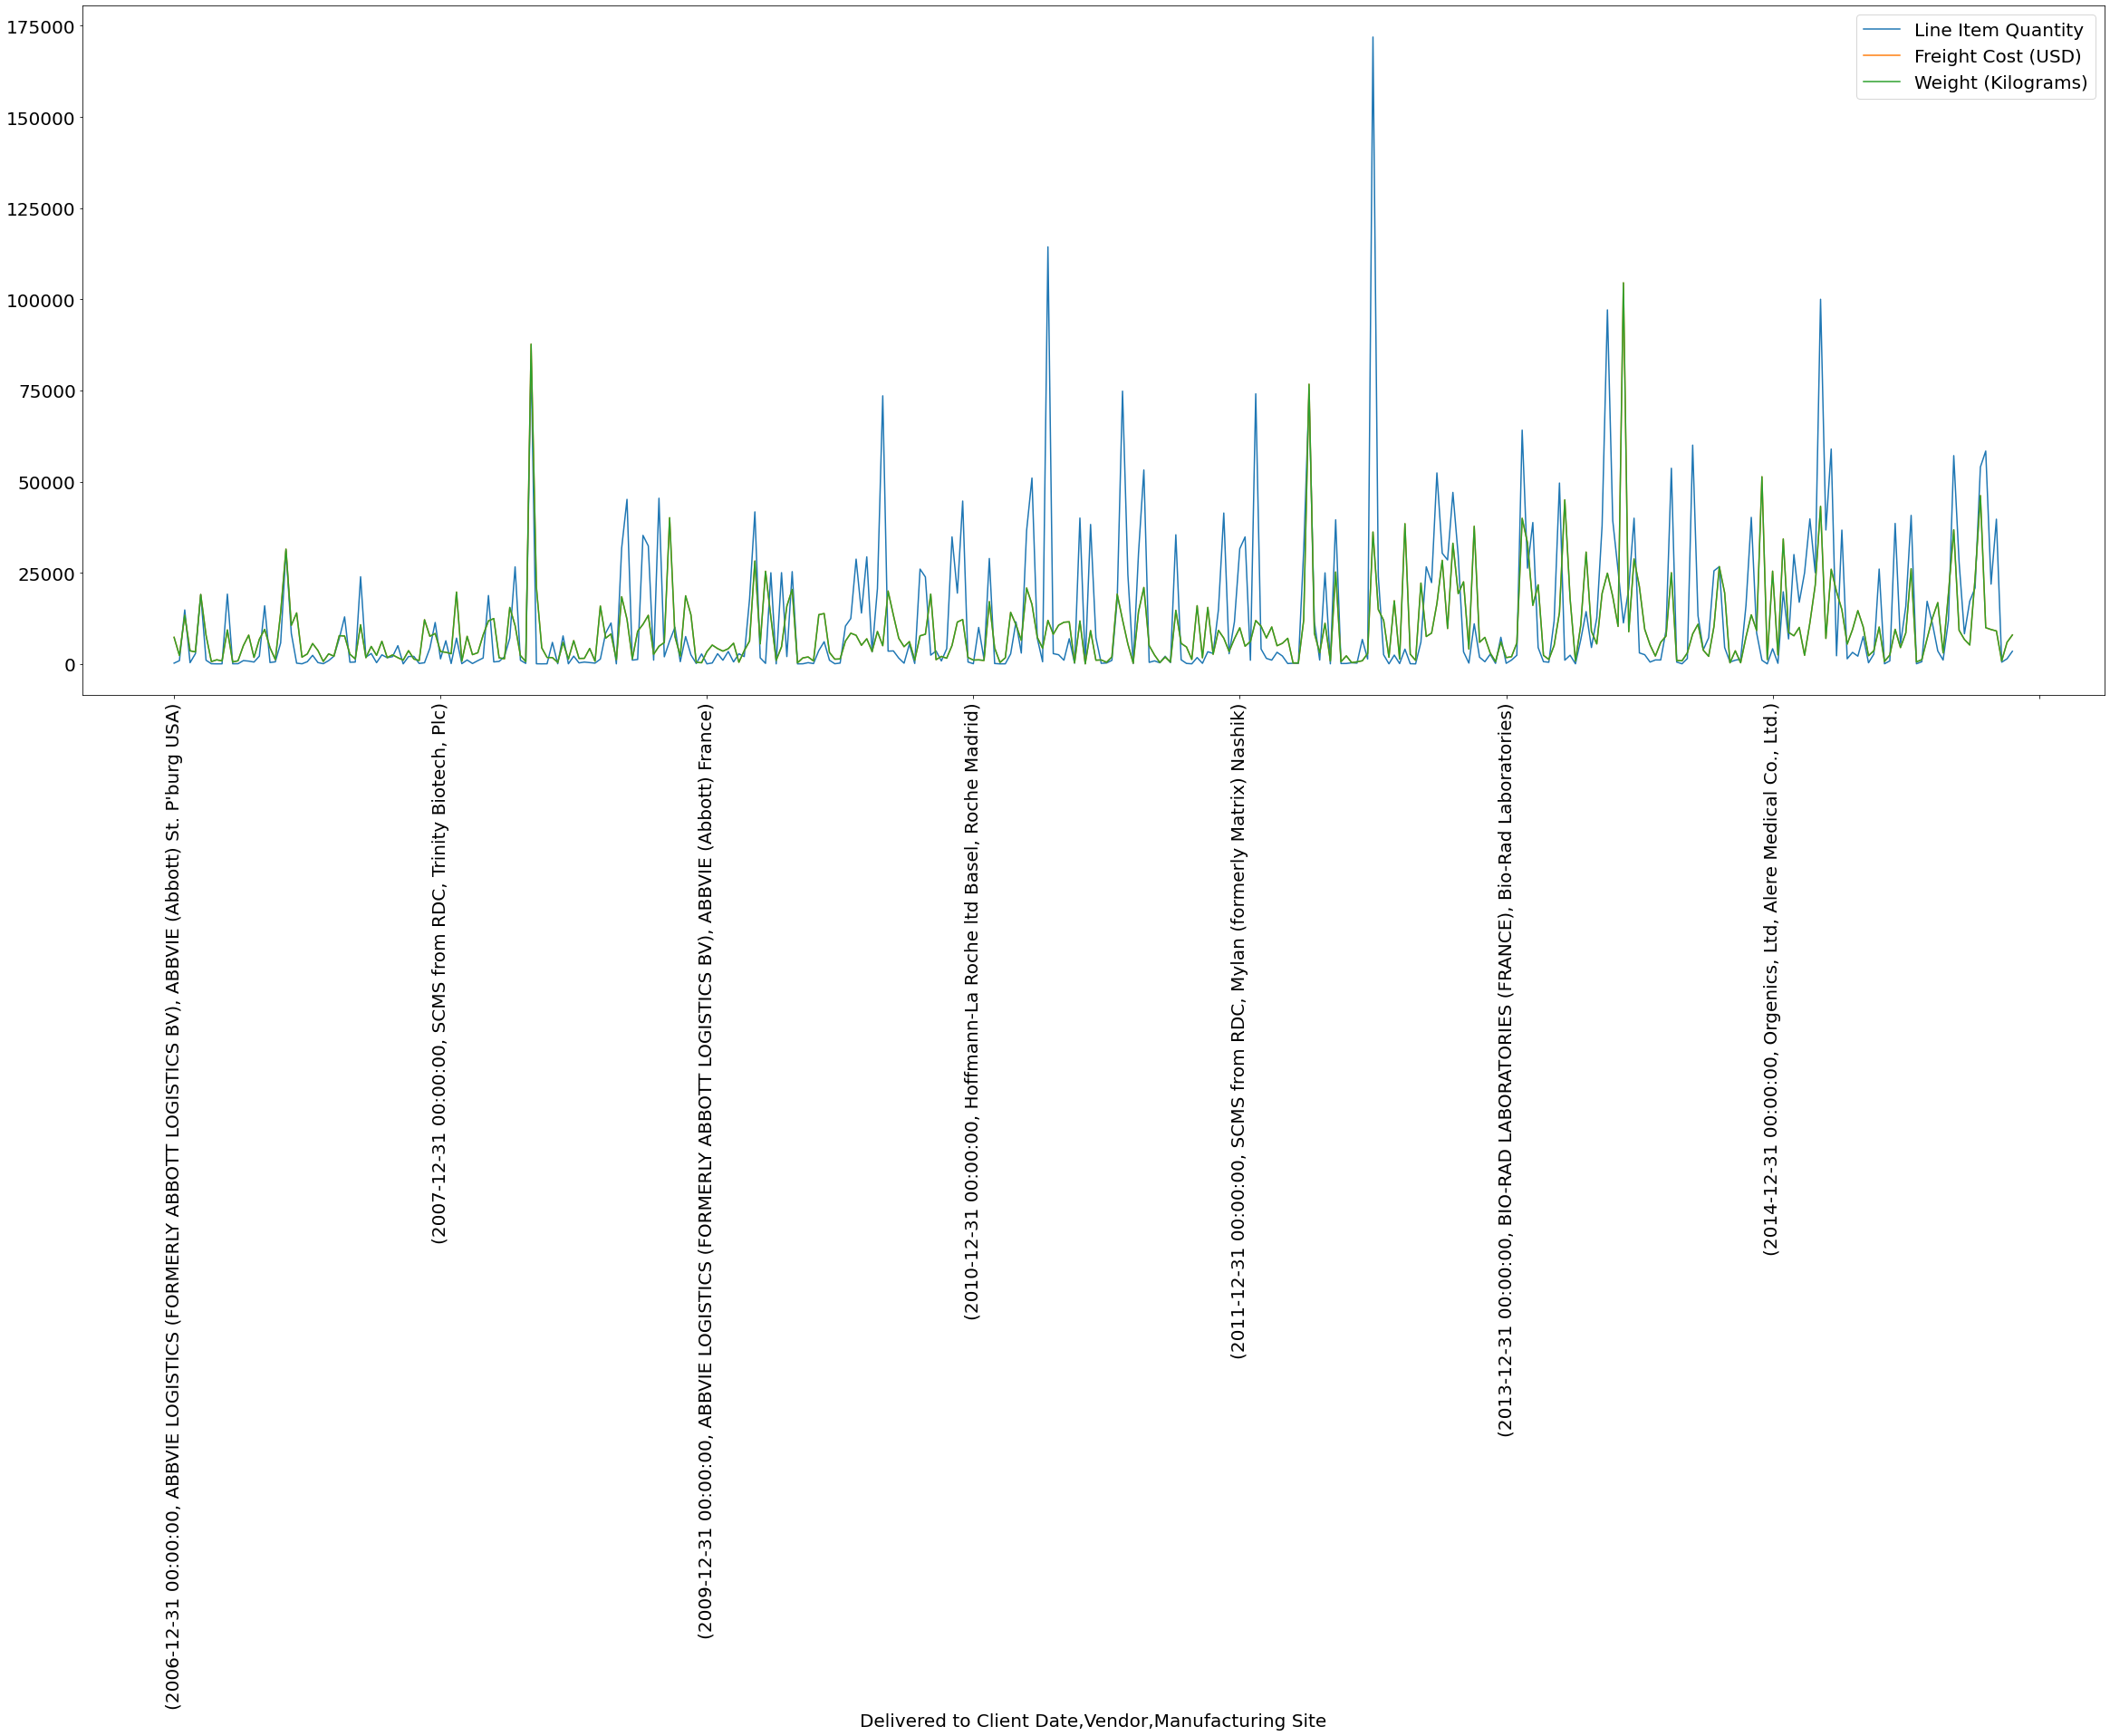

In [ ]:
#plt.rcParams.update({'font.size': 20})
d.plot(figsize=(40,14))
plt.xticks(rotation=90)
plt.tight_layout()

#### Analysis:

We can clearly see that Weight (Kilograms) and Freight Cost (USD) overlap each other such that they have strong correlation with each other, Freight Cost (USD) and Line Item Quantity have little variations among them.

In [ ]:
e

Unit Price  \
Delivered to Client Date Vendor                                             Manufacturing Site                                               
2006-12-31               ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)    ABBVIE (Abbott) St. P'burg USA                        1.000000   
                         Abbott GmbH & Co. KG                               ABBVIE GmbH & Co.KG Wiesbaden                         0.800000   
                         Aurobindo Pharma Limited                           Aurobindo Unit III, India                             0.189091   
                         BIO-RAD LABORATORIES (FRANCE)                      Bio-Rad Laboratories                                  1.880000   
                         BRISTOL-MYERS SQUIBB                               BMS Meymac, France                                    0.120000   
                         CIPLA LIMITED                                      Cipla, Goa, India                                     0.570000   
                         Hoffmann-La Roche ltd Basel                        Roche Madrid                                          0.610000   
                         OMEGA DIAGNOSTICS LTD                              OMEGA Diagnostics, UK                                 1.250000   
                         Orasure Technologies Inc.                          Pacific Biotech, Thailand                             4.000000   
                         RANBAXY Fine Chemicals LTD.                        Ranbaxy Fine Chemicals LTD                            0.970000   
                         SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LABO... Ranbaxy, Paonta Shahib, India                         0.065000   
                         Standard Diagnostics, Inc.                         Standard Diagnostics, Korea                           0.790000   
                         Trinity Biotech, Plc                               Not Applicable                                        1.750000   
                                                                            Trinity Biotech, Plc                                  2.000000   
2007-12-31               ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)    ABBVIE (Abbott) Logis. UK                             0.890000   
                                                                            ABBVIE Ludwigshafen Germany                           0.680000   
                         Abbott GmbH & Co. KG                               ABBVIE GmbH & Co.KG Wiesbaden                         0.800000   
                         Aurobindo Pharma Limited                           Aurobindo Unit III, India                             0.111250   
                         BIO-RAD LABORATORIES (FRANCE)                      Bio-Rad Laboratories                                  1.900000   
                         BRISTOL-MYERS SQUIBB                               BMS Meymac, France                                    0.113333   
                         CHEMBIO DIAGNOSTIC SYSTEMS, INC.                   Chembio Diagnostics Sys. Inc.                         1.350000   
                         CIPLA LIMITED                                      Cipla, Goa, India                                     0.142000   
                         GILEAD SCIENCES IRELAND, INC.                      Gilead(Nycomed) Oranienburg DE                        0.725000   
                         Hoffmann-La Roche ltd Basel                        Roche Madrid                                          0.610000   
                         Orasure Technologies Inc.                          Pacific Biotech, Thailand                             3.700000   
                         Orgenics, Ltd                                      Inverness Japan                                       0.720000   
                         Premier Medical Corporation Ltd.                   Premier Med. Corp Ltd. India                          0.587500   
          

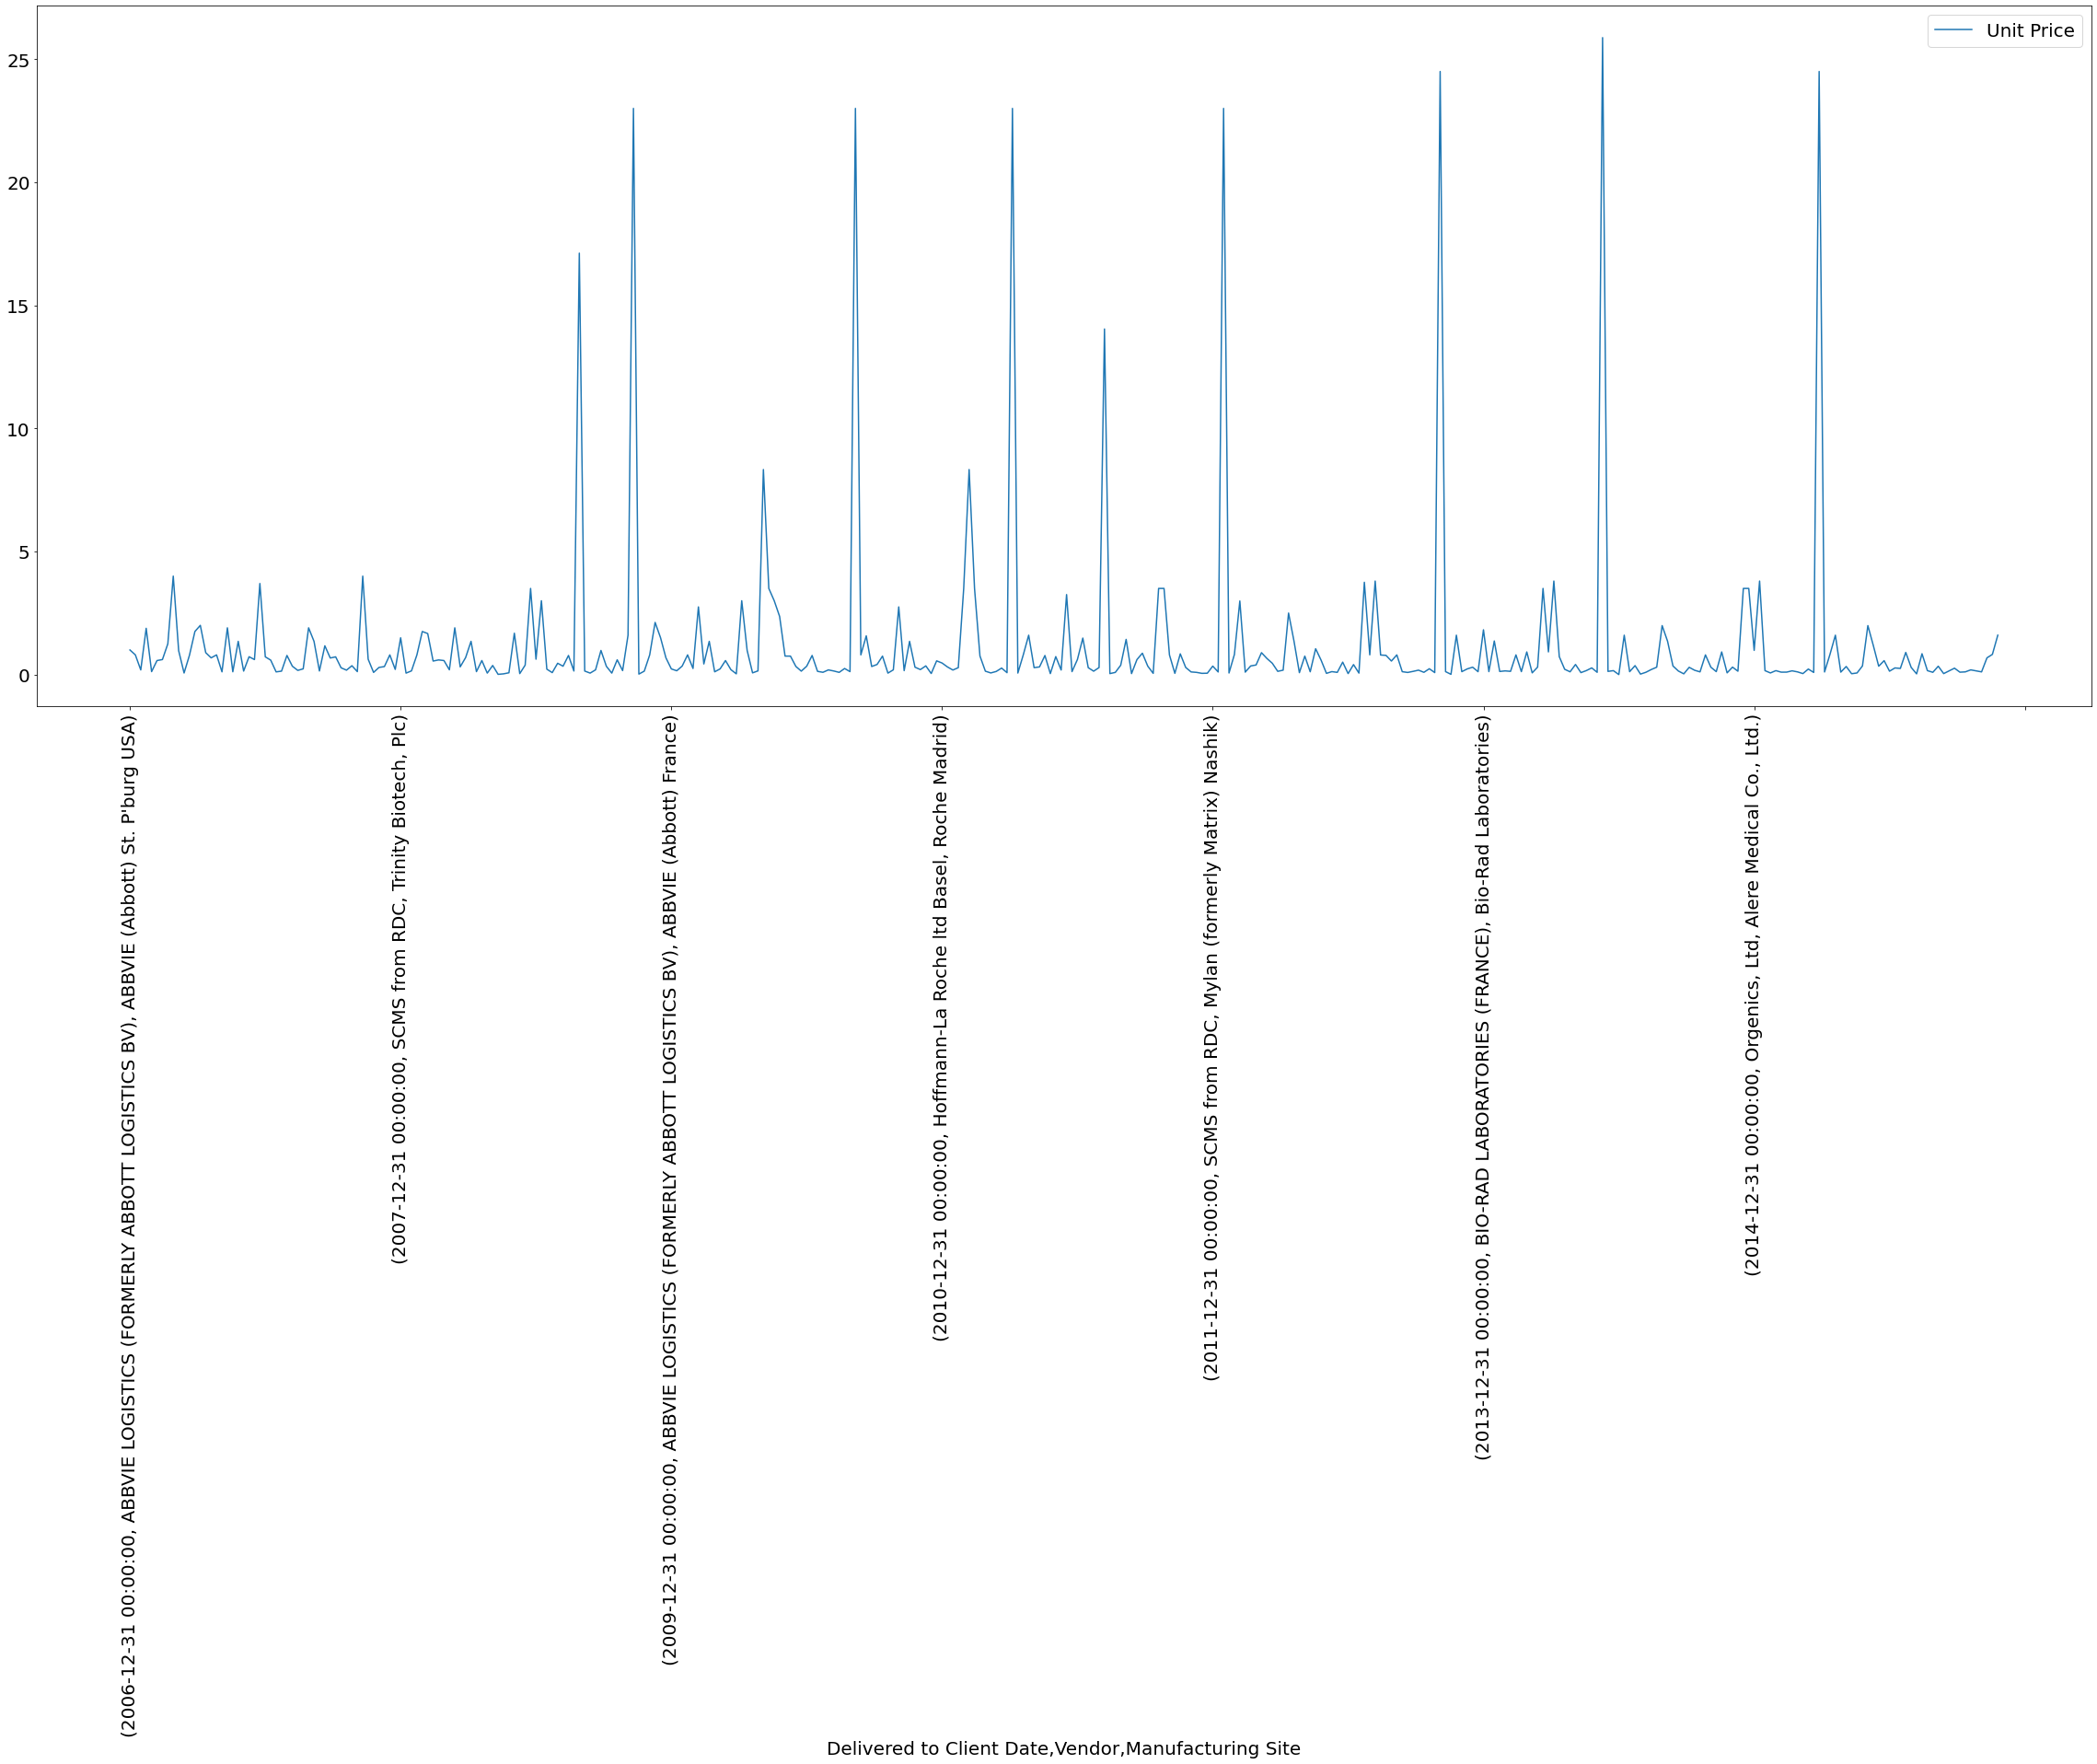

In [ ]:
e[['Unit Price']].plot(figsize=(40,14))
plt.xticks(rotation=90)
plt.tight_layout()

#### Analysis:

In the above visualization with Unit price, all the peaks of 23 USD is from the vendor 'SHANGHAI KEHUA BIOENGINEERING CO.,LTD. (KHB)', where the dosage form is Test kit, Product Group is HRDT, Sub Classification is HIV test, Brand is Colloidal Gold.

In [ ]:
f

Freight Cost (USD)  \
Delivered to Client Date Vendor                                             Manufacturing Site                                                       
2006-12-31               ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)    ABBVIE (Abbott) St. P'burg USA                             7286.160000   
                         Abbott GmbH & Co. KG                               ABBVIE GmbH & Co.KG Wiesbaden                              2309.292000   
                         Aurobindo Pharma Limited                           Aurobindo Unit III, India                                 13292.548182   
                         BIO-RAD LABORATORIES (FRANCE)                      Bio-Rad Laboratories                                       3580.520000   
                         BRISTOL-MYERS SQUIBB                               BMS Meymac, France                                         3292.150000   
                         CIPLA LIMITED                                      Cipla, Goa, India                                         19044.320000   
                         Hoffmann-La Roche ltd Basel                        Roche Madrid                                               7828.280000   
                         OMEGA DIAGNOSTICS LTD                              OMEGA Diagnostics, UK                                       633.730000   
                         Orasure Technologies Inc.                          Pacific Biotech, Thailand                                  1117.395000   
                         RANBAXY Fine Chemicals LTD.                        Ranbaxy Fine Chemicals LTD                                  819.935000   
                         SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LABO... Ranbaxy, Paonta Shahib, India                              9315.275000   
                         Standard Diagnostics, Inc.                         Standard Diagnostics, Korea                                 515.320000   
                         Trinity Biotech, Plc                               Not Applicable                                              854.340000   
                                                                            Trinity Biotech, Plc                                       4989.870000   
2007-12-31               ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)    ABBVIE (Abbott) Logis. UK                                  7889.610000   
                                                                            ABBVIE Ludwigshafen Germany                                1767.380000   
                         Abbott GmbH & Co. KG                               ABBVIE GmbH & Co.KG Wiesbaden                              6762.775714   
                         Aurobindo Pharma Limited                           Aurobindo Unit III, India                                  9466.005000   
                         BIO-RAD LABORATORIES (FRANCE)                      Bio-Rad Laboratories                                       4445.750000   
                         BRISTOL-MYERS SQUIBB                               BMS Meymac, France                                         1171.136667   
                         CHEMBIO DIAGNOSTIC SYSTEMS, INC.                   Chembio Diagnostics Sys. Inc.                             14058.224000   
                         CIPLA LIMITED                                      Cipla, Goa, India                                         31480.120000   
                         GILEAD SCIENCES IRELAND, INC.                      Gilead(Nycomed) Oranienburg DE                            10559.095000   
                         Hoffmann-La Roche ltd Basel                        Roche Madrid                                              13981.960000   
                         Orasure Technologies Inc.                          Pacific Biotech, Thailand                                  1845.642000   
                         Orgenics, Ltd                                      In

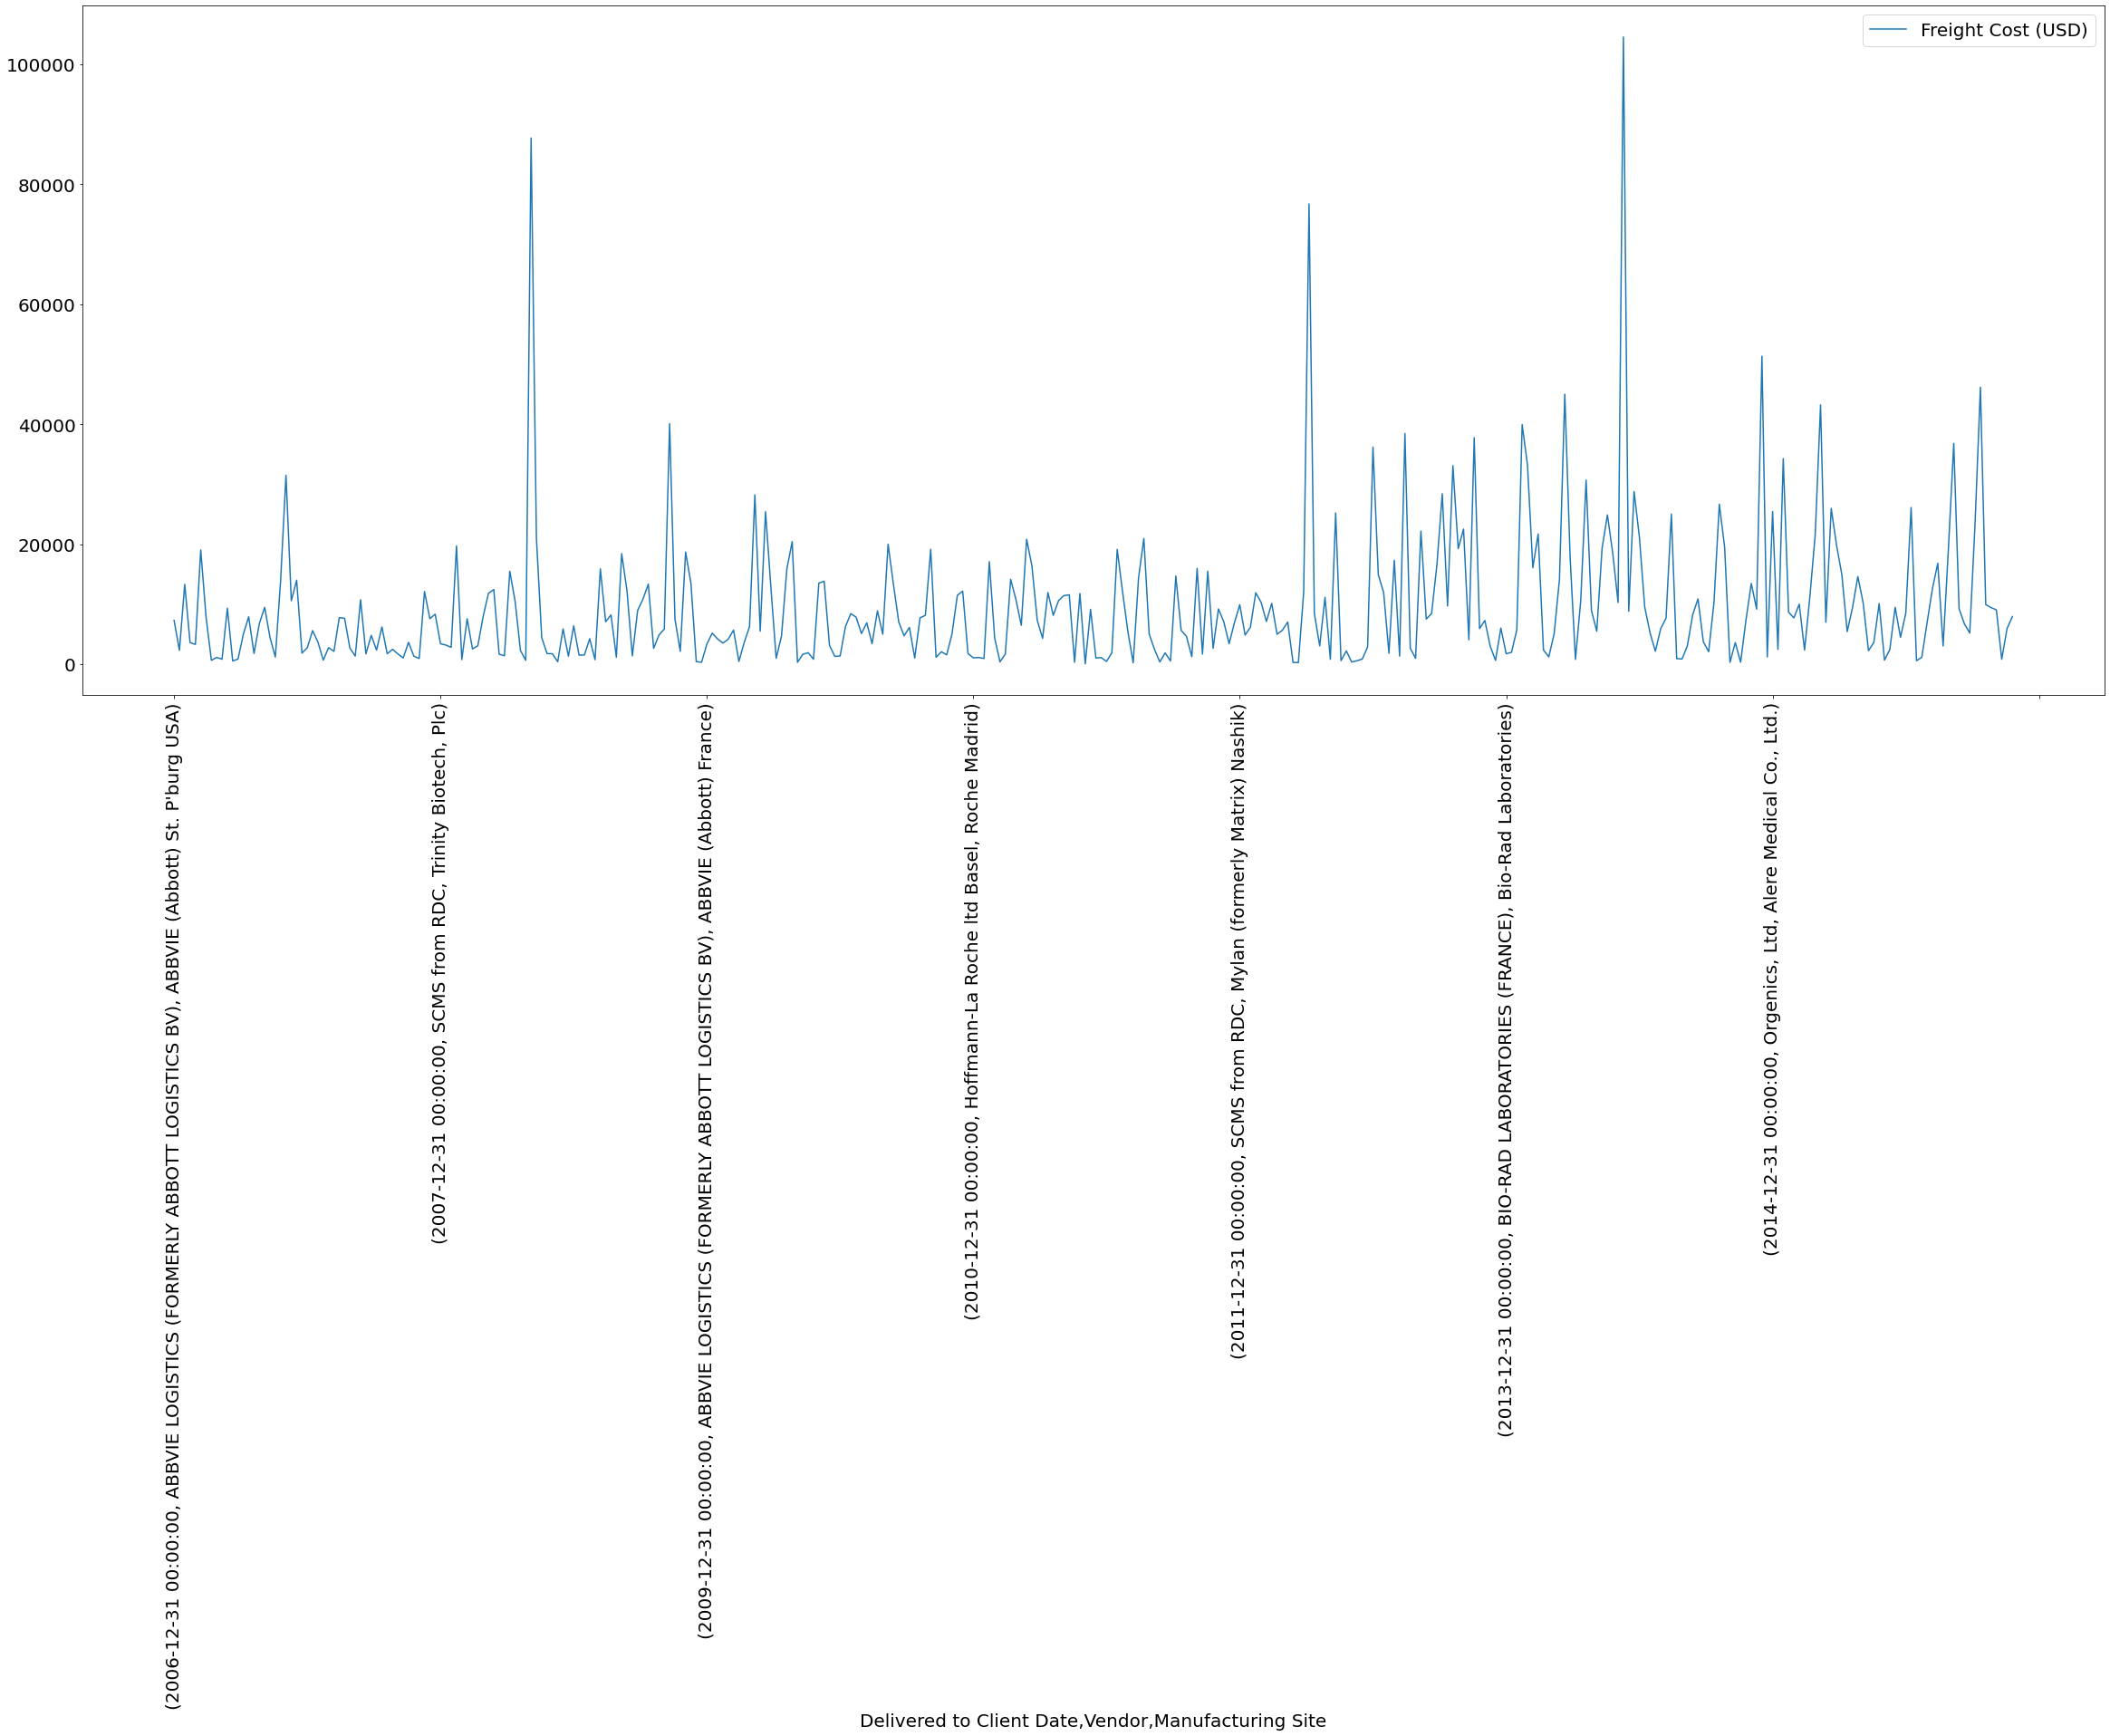

In [ ]:
f.plot(figsize=(40,14))
plt.xticks(rotation=90)
plt.tight_layout()

In [15]:
catg_cols = [i for i in df.columns if df[i].dtypes=='O' and i not in ['PQ First Sent to Client Date','PO Sent to Vendor Date']]
print(catg_cols)
df[catg_cols].head()

['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'Product Group', 'Sub Classification', 'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form', 'Manufacturing Site', 'First Line Designation']


Project Code            PQ # PO / SO # ASN/DN #        Country Managed By  \
0   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   PMO - US   
1   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   PMO - US   
2   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   PMO - US   
3   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   PMO - US   
4   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   PMO - US   

   Fulfill Via Vendor INCO Term Shipment Mode Product Group  \
0  Direct Drop              EXW           Air          HRDT   
1  Direct Drop              EXW           Air           ARV   
2  Direct Drop              FCA           Air          HRDT   
3  Direct Drop              EXW           Air           ARV   
4  Direct Drop              EXW           Air           ARV   

  Sub Classification                                             Vendor  \
0           HIV test                        RANBAXY Fine Chemicals LTD.   
1          Pediatric                           Aurobindo Pharma Limited   
2           HIV test                               Abbott GmbH & Co. KG   
3              Adult  SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...   
4              Adult                           Aurobindo Pharma Limited   

                                    Item Description  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...   
1  Nevirapine 10mg/ml, oral suspension, Bottle, 2...   
2     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3                 Lamivudine 150mg, tablets, 60 Tabs   
4                  Stavudine 30mg, capsules, 60 Caps   

                         Molecule/Test Type      Brand   Dosage  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test     Reveal        0   
1                                Nevirapine    Generic  10mg/ml   
2       HIV 1/2, Determine Complete HIV Kit  Determine        0   
3                                Lamivudine    Generic    150mg   
4                                 Stavudine    Generic     30mg   

       Dosage Form             Manufacturing Site First Line Designation  
0         Test kit     Ranbaxy Fine Chemicals LTD                    Yes  
1  Oral suspension      Aurobindo Unit III, India                    Yes  
2         Test kit  ABBVIE GmbH & Co.KG Wiesbaden                    Yes  
3           Tablet  Ranbaxy, Paonta Shahib, India                    Yes  
4          Capsule      Aurobindo Unit III, India                    Yes

In [16]:
print(*[f'{i} : {len(df[i].unique())} unique values' for i in catg_cols],sep='\n')

Project Code : 132 unique values
PQ # : 1153 unique values
PO / SO # : 5595 unique values
ASN/DN # : 6198 unique values
Country : 39 unique values
Managed By : 2 unique values
Fulfill Via : 2 unique values
Vendor INCO Term : 8 unique values
Shipment Mode : 5 unique values
Product Group : 5 unique values
Sub Classification : 6 unique values
Vendor : 55 unique values
Item Description : 167 unique values
Molecule/Test Type : 84 unique values
Brand : 45 unique values
Dosage : 54 unique values
Dosage Form : 17 unique values
Manufacturing Site : 79 unique values
First Line Designation : 2 unique values


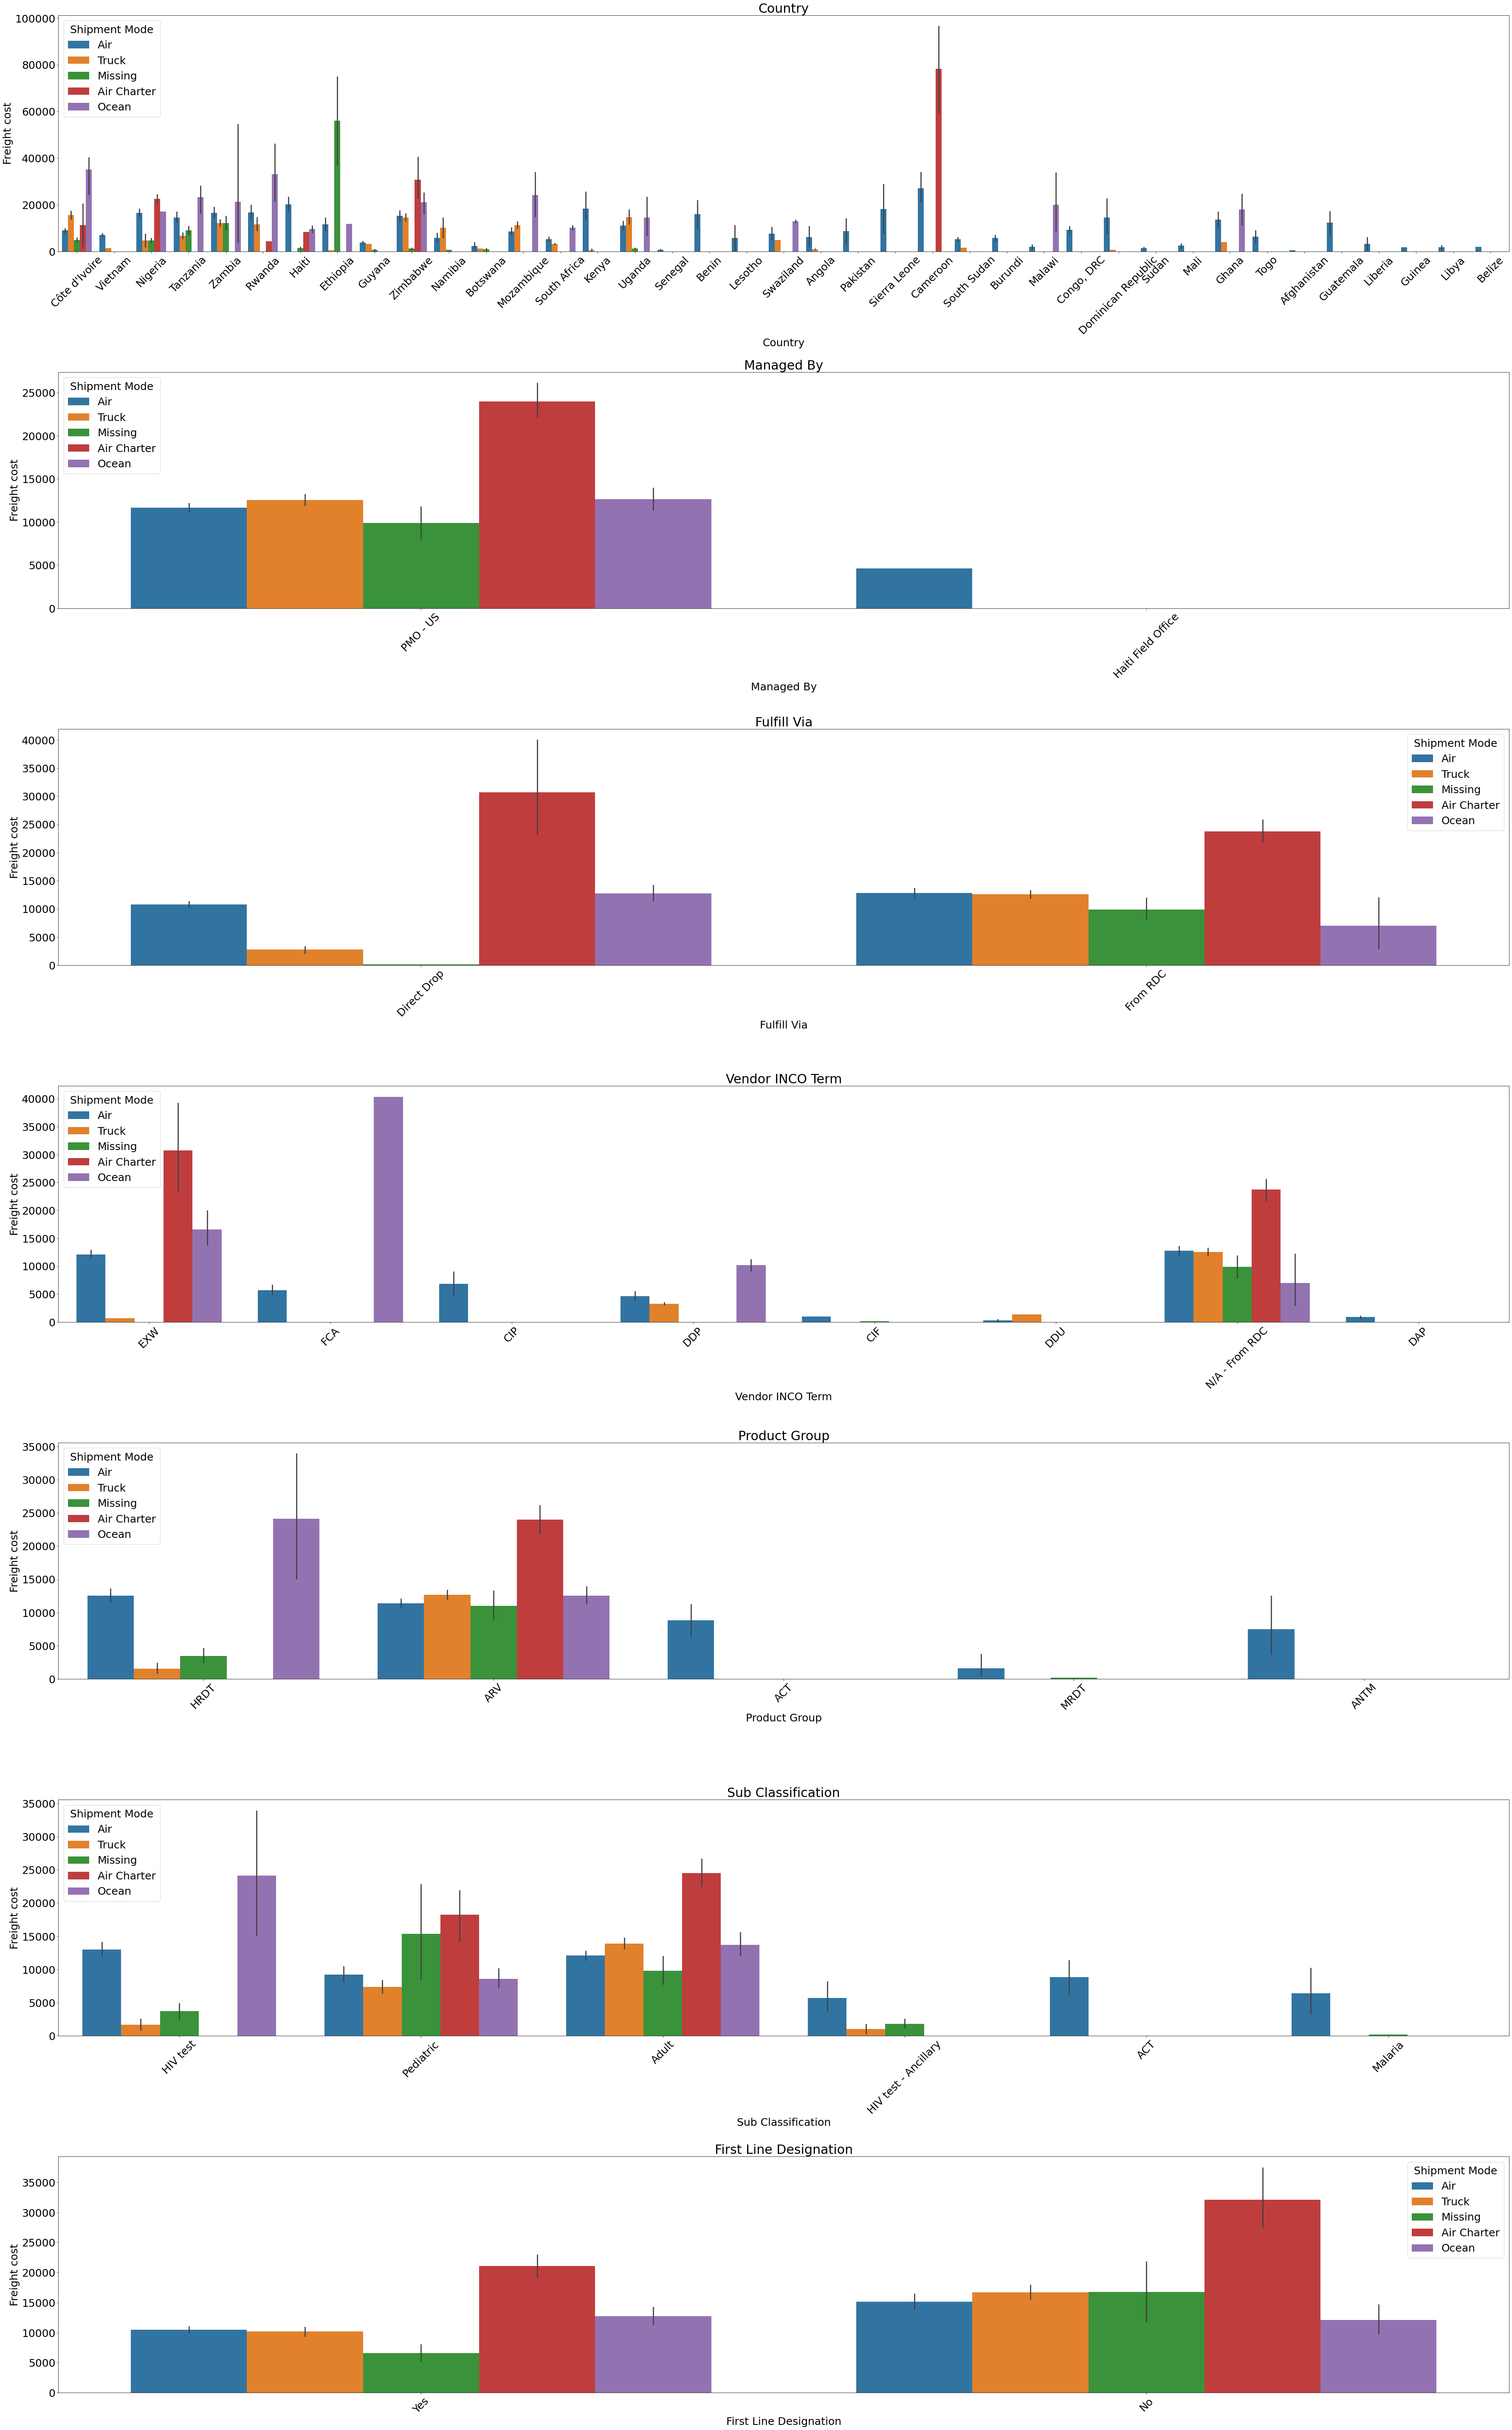

In [ ]:
## Visualizing the categorical columns with target feature

#plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(50,80))
number=1
for i in ['Country','Managed By','Fulfill Via','Vendor INCO Term','Product Group','Sub Classification','First Line Designation']:
    if number <= 7:
        plt.subplot(7,1,number)
        #data = df.groupby(i)['Freight Cost (USD)'].median()
        sns.barplot(df[i],df['Freight Cost (USD)'],hue=df['Shipment Mode'])
        plt.title(i)
        plt.xlabel(i)
        plt.ylabel('Freight cost')
        plt.xticks(rotation=45)
    number+=1
plt.tight_layout()

Airfreight generally refers to the shipment of goods and packages through air carriers. Air chartering is more specific and it is used in case of extreme emergencies. The air charting process is precise and it works based on the needs of the customer.

#### Analysis:

From the above visualization we can conclude that:

- The country Cameroon has the highest freight cost of nearly 80000 USD and it used air charter as its shipment mode.
- Most of the country uses air shipment mode with freight cost in the range of 0-30000 USD.
- Managed by - PMO US uses all kinds of shipment mode in which air charter has the highest freight cost, on the other hand Haiti Field office uses only air shipment mode.
- Vendor inco terms
    - EXW - uses air,truck,air charter and ocean shipment mode, with air charter tops the freight cost.
    - FCA - uses onlu air and ocean shipment with ocean shipment has highest freight cost of 35000 to 40000 USD.
    - CIP - uses only air shipment mode.
    - DDP - uses air,truck and ocean shipment mode.
    - CIF - only air shipment mode.
    - DDU - only air and truck.
    - N/A from RDC - uses air,truck,air charter and ocean shipment mode with air charter with highest freight cost among them.
    - DAP - only air shipment mode.
- Product group
    - HRDT - Ocean shipment mode has highest freight cost among all product groups.
    - ARV - all shipment modes is used in ARV product group.
    - ACT,MRDT,ANTM - These product uses only air shipment mode.

<AxesSubplot:>

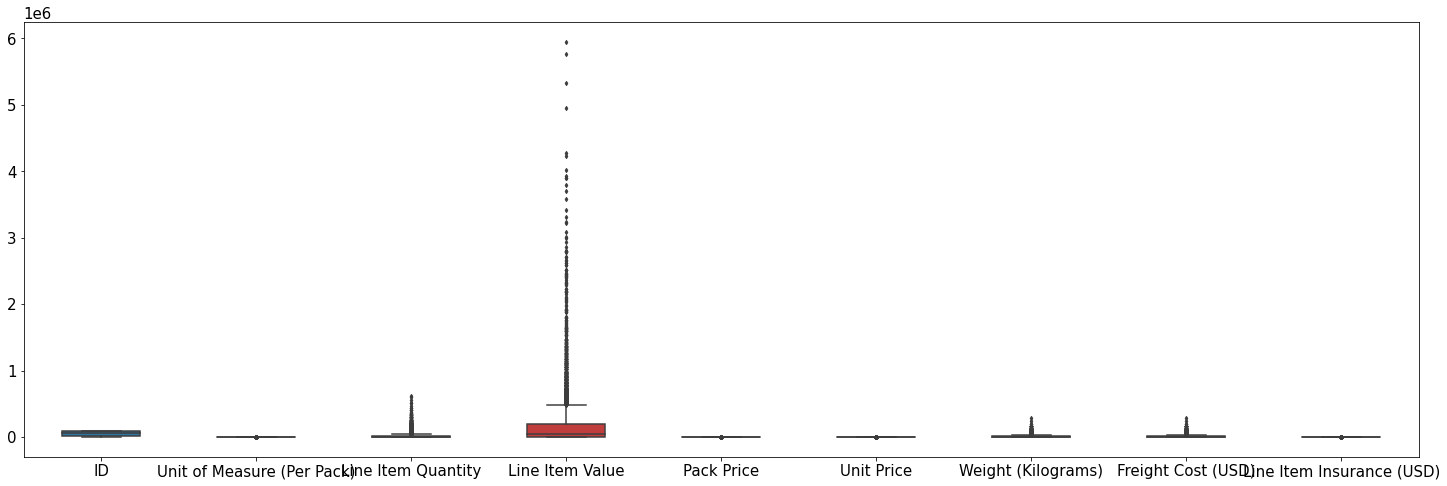

In [ ]:
#### Outliers

#plt.rcParams.update({'font.size': 15})
fig,ax= plt.subplots(figsize=(25,8))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)

<AxesSubplot:>

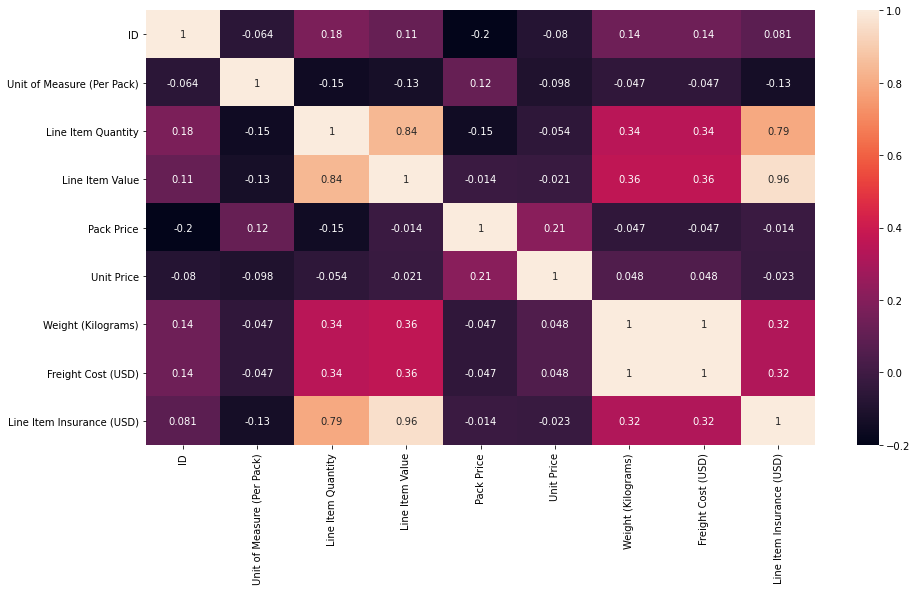

In [ ]:
#plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
X_test = df.drop('Freight Cost (USD)',axis=1)
y_test = df['Freight Cost (USD)']